# Sentiment Analysis (n-gram)

Based on **Stats Wire** video: https://www.youtube.com/watch?v=ic5XcUxiUrI&list=PLBSCvBlTOLa_wS8iy84DfyizdSs7ps7L5&index=11

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score


In [2]:
df1 = pd.read_csv("data/amazon_1.csv")
df2 = pd.read_csv("data/amazon_2.csv")

# Concatenate the two DataFrames
df = pd.concat([df1, df2], ignore_index=True)

In [3]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [4]:
df.shape

(413840, 6)

In [7]:
# Missing values
df.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

In [8]:
# Missing values sorted
df.isnull().sum().sort_values(ascending=False)

Brand Name      65171
Review Votes    12296
Price            5933
Reviews            62
Product Name        0
Rating              0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum().sort_values(ascending=False)

Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64

In [11]:
df["Rating"].value_counts()

5    180253
1     57535
4     50421
3     26058
2     20068
Name: Rating, dtype: int64

In [12]:
df[df["Rating"] != 3].head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [13]:
# removing 3 star ratings
df = df[df["Rating"] != 3]

In [14]:
df["Rating"].value_counts()

5    180253
1     57535
4     50421
2     20068
Name: Rating, dtype: int64

In [15]:
# Creating new labels
df["Positively Rated"] = np.where(df["Rating"] > 3, 1, 0)

In [16]:
df["Positively Rated"].value_counts()

1    230674
0     77603
Name: Positively Rated, dtype: int64

In [17]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1


<Axes: xlabel='Positively Rated', ylabel='count'>

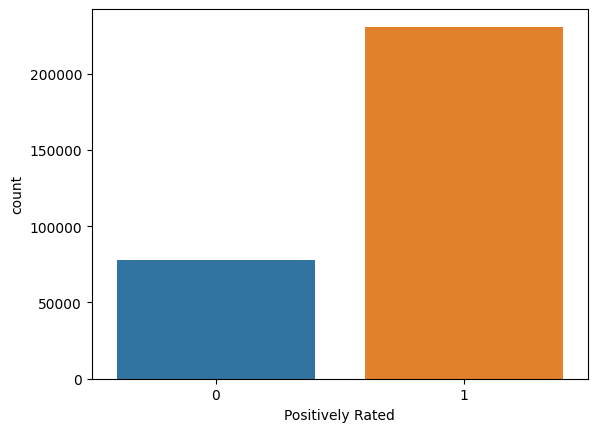

In [20]:
# specify the order of the labels
order = [0, 1]

# plot the countplot
sns.countplot(data=df, x="Positively Rated", order=order)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df["Reviews"], df["Positively Rated"], random_state=50, test_size=0.25)

In [24]:
print(X_train[:5])

333828                                  It works very well.
104940                                             useless!
45920     It "looked" new, as it was in a box packaged i...
360788    Working perfectly internationally... cant wait...
51954                 Bad battery does not keep a charge...
Name: Reviews, dtype: object


In [25]:
print(y_train[:5])

333828    1
104940    0
45920     0
360788    1
51954     0
Name: Positively Rated, dtype: int64


## n-gram technique

The *n-gram** technique is a text analysis approach used in NLP to capture and represent the relationships between adjacent elements (such as words or characters) in a sequence of thext. A n-gram refers to a notigous sequence of n items.

The n-gram technique involves breaking down a text into these n-grams, which can be unigrams (single itmes), bigrams (sequences of two item), trigrams (sequences of three items), or higher-order n-grams. By examining the frequency and co-occurrence of these n-grams. valuable insights can be derived about the language, patterns and structures within the text.

N-grams are often used as features in various NLP tasks and machin learning models. For example, in sentiment analysis, n-gram can help capture important phrases or combinations of words that contribute to the overall sentiment expressed in a text. In language modeling, b-grams can be used to predict the likelihood of a particular word or sequence of words occuring based on the previous context.

The choice of the value of n in the n-gram technique depends on the specific task and the characteristics of the text data. Higher-order n-grams can capture more context but may result in larger feature space and increased computional complexity.

Overall, the n-gram technique is a powerful tool in NLP for analyzing ad understanding the relationships between adjacent elements in a text, enabling a wide range of applications such as sentiment analysis language modeling, information retrieval, and text generation.

In [29]:
# Arguments: 
# min_df=5 removes words that occur less than 5 times in all texts
# ngram_range specifies the range of n-gram enghts in tuple.
vect = CountVectorizer(min_df= 5, ngram_range=(1,2)).fit(X_train)

In [30]:
len(vect.get_feature_names_out())

199926

In [31]:
X_train_vectorized = vect.transform(X_train)

## Logistic Regression

In [36]:
model = LogisticRegression(max_iter=1000)

In [37]:
model.fit(X_train_vectorized, y_train)

LogisticRegression(max_iter=1000)

In [38]:
# Save predictions
predictions = model.predict(vect.transform(X_test))

In [39]:
print(predictions[:5])

[0 1 0 1 1]


## ROC AUC

In [41]:
print(f"AUC: {roc_auc_score(y_test, predictions)}")

AUC: 0.9664984423890043


In [42]:
feature_names = np.array(vect.get_feature_names_out())

In [43]:
sorted_coef_index = model.coef_[0].argsort()

In [46]:
print(f"Negative words {feature_names[sorted_coef_index[:10]]}")

Negative words ['no good' 'junk' 'worst' 'horrible' 'not good' 'not happy' 'garbage'
 'terrible' 'not very' 'ok not']


In [47]:
print(f"Positive words: {feature_names[sorted_coef_index[:-11:-1]]}")

Positive words: ['not bad' 'excelent' 'excelente' 'excellent' 'no problems' 'perfect'
 'awesome' 'amazing' 'no issues' 'great']
